Accuracy:  0.86


Text(0, 0.5, 'Y')

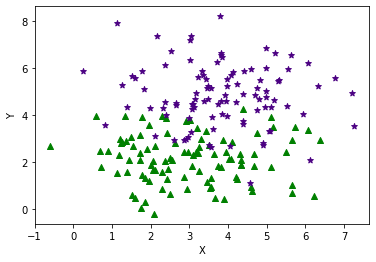

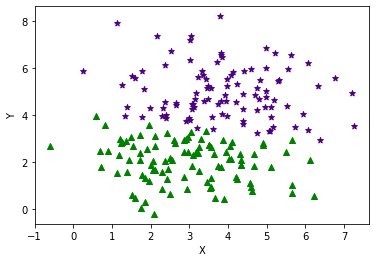

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline  

import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(0)

num_points = 100 #кількість точок кожного класу

#два синтетичних набори точок на площині
mean_1 = [3, 2]  #Тточка (3,2) - почти как центр 
cov_1 = [[2, 0], [0, 1]] # разброс точек
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)
mean_2 = [4, 5]
cov_2 = [[2, 0], [0, 2]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

#Візуалізуйте результат
plt.scatter(x_1[:, 0], x_1[:, 1], marker = '^', color='green')
plt.scatter(x_2[:, 0], x_2[:, 1], marker = '*', color='indigo')
plt.xlabel('X')
plt.ylabel('Y')


# додайте ім мітки класів (0 і 1)
x = np.concatenate([x_1, x_2])
labels = np.array([0] * num_points + [1] *  num_points)
y = np.hstack((np.array([0] * num_points), np.array([1]*num_points)))
# Розділіть дані на класи за допомогою логістичної регресії


lr_a = 0.05
lr_b= 1
a0=np.array([0,0]) # 2 значения для 2мерного х
b0=0


# основуется на сигмоиде, знач 0 - 1
# если сигмоида > 0,5 тогда 1, меньше - 0, так и определяется метка класса 
def sigmoida(value):
    return 1 / (1 + np.exp(-value))

#градиентный спуск
a = a0
b = b0
for i in range(1000):  
    f = sigmoida(x.dot(a) + b)  #сигмоида от формулы у
    #векторное умножение + б 
    da = np.dot(x.T, (f - y))/x.shape[0] #транспонированный х вектор.умнож на разницу
    #количество рядков в массиве х
    db = (f - y).mean() #средняя разность
    a = a - lr_a * da  #cам град. спуск
    b = b - lr_b * db

#Прогноз (у с шапочкой)
predict = np.zeros(x.shape[0])  #заполняем по умолчанию 0
f = sigmoida(x.dot(a) + b)  # вызов сигмоиды на рассчитатоном по гр спуске параметрам
for i in range(x.shape[0]):   #запись в каждую строку
    if(f[i] >= 0.5):   
        predict[i] = 1    #перезапись1 там, где класс 1
# средняя (меан) разность начального значения у и того, что предсказали


#Mетрикa accuracy

#чем больше разность между прогнозом и данными, тем меньше аккюранси
print("Accuracy: ", 1 - abs(y-predict).mean())

#Visual

plt.figure(figsize=(6,4))# вторая картинка
plt.scatter(x[:,0][predict==0], x[:,1][predict==0],color="green", marker = '^')
#массив двумерный, полуить резалт можно только с одномерного
#рассмотривам двумерный х по каждому из "размерностей", прпавая и левая 
plt.scatter(x[:,0][predict==1], x[:,1][predict==1], color="indigo", marker = '*')
plt.xlabel('X')
plt.ylabel('Y')

In [8]:
# num_points = 100
# Accuracy:  0.86

# num_points = 300
# Accuracy:  0.8933333333333333
# num_points = 1000
# Accuracy:  0.9005

# iterations = 10  (num_points = 100)
# Accuracy:  0.795
#  iterations = 10000
#  Accuracy:  0.86
#  iterations = 2000
#  Accuracy:  0.855
#
#lr_a = 4
#lr_b= 0.1
#Accuracy:  0.79
#
#lr_a = 0.005
#lr_b= 0.1
#Accuracy:  0.855
#
#lr_a = 0.5
#lr_b= 21
#Accuracy:  0.885 как максимум до которого дошла подором
#
#lr_a = 0.5
#lr_b= 0.01
#Accuracy: 0.79